In [2]:
import os
import tweepy as tw
import pandas as pd
tw_key = 'ZMW'
tw_secret = 'CrJ061ey'
tw_access_token = '14993'
tw_access_token_secret = '97mH720sQ'
auth = tw.OAuthHandler(tw_key, tw_secret)
auth.set_access_token(tw_access_token, tw_access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)
search_words = "Ministry of Truth"

In [3]:
tweets = tw.Cursor(api.search, q=search_words, lang="en").items(1000)
MOTTweets = [[tweet.id,tweet.user.screen_name, tweet.user.verified, tweet.text, tweet.place, tweet.user.location, tweet.source,tweet.created_at,tweet.retweet_count,tweet.favorite_count] 
             for tweet in tweets]
MOTTweetsdf = pd.DataFrame(data=MOTTweets, columns=['id','user',"verified","text","source","place","TweetSource","created_at","retweetCount","Likes"])

In [4]:
source_counts = MOTTweetsdf['TweetSource'].value_counts(dropna=True,sort=True)
MOTdf_source_counts = source_counts.reset_index()
MOTdf_source_counts.columns = ['source', 'counts'] # change column names
print(MOTdf_source_counts)
substringAndroidsource = "Twitter for Android"
substringWebAppsource = "Twitter Web App"
substringiossource = "Twitter for iPhone"
substringiospadsource = "Twitter for iPad"

                  source  counts
0     Twitter for iPhone     313
1    Twitter for Android     298
2        Twitter Web App     295
3       Twitter for iPad      67
4              TweetDeck      11
5       Tweetbot for iΟS       3
6          WordPress.com       2
7          Talon Android       2
8                 Buffer       2
9   Twitterrific for iOS       2
10               Fenix 2       1
11   Twidere for Android       1
12      Tweetbot for Mac       1
13       SocialBee.io v2       1
14        Hootsuite Inc.       1


In [5]:
for i, row in MOTdf_source_counts.iterrows():
  data = f"{row['source']}"
  if data is not None:
    if substringAndroidsource in data:
      MOTdf_source_counts.at[i, 'source'] = "Twitter for Android"
    elif substringWebAppsource in data:
      MOTdf_source_counts.at[i, 'source'] = "Twitter Web App"
    elif substringiossource in data:
      MOTdf_source_counts.at[i, 'source'] = "Twitter for iPhone"
    elif substringiospadsource in data:
      MOTdf_source_counts.at[i, 'source'] = "Twitter for iPhone"
    else:
      MOTdf_source_counts.at[i, 'source'] = "Other"
MOTdf_source_counts

,source,counts
0,Twitter for iPhone,313
1,Twitter for Android,298
2,Twitter Web App,295
3,Twitter for iPhone,67
4,Other,11
5,Other,3
6,Other,2
7,Other,2
8,Other,2
9,Other,2


In [6]:
#MOTdf_source_counts.drop(MOTdf_source_counts[MOTdf_source_counts['source'] == "Other"].index, inplace = True) #delete if multiple
#MOTdf_source_counts.loc[4] = ['Other', '27'] #Replace count with updated count
#MOTdf_source_counts #check

,source,counts
0,Twitter for iPhone,313
1,Twitter for Android,298
2,Twitter Web App,295
3,Twitter for iPhone,67
4,Other,27


In [8]:
#MOTdf_source_counts.drop(MOTdf_source_counts[MOTdf_source_counts['source'] == "Twitter for iPhone"].index, inplace = True) #delete if multiple "Twitter for iPhone"
#MOTdf_source_counts.loc[0] = ['Twitter for iPhone', '380'] #Replace count with updated count
#MOTdf_source_counts

,source,counts
1,Twitter for Android,298
2,Twitter Web App,295
4,Other,27
0,Twitter for iPhone,380


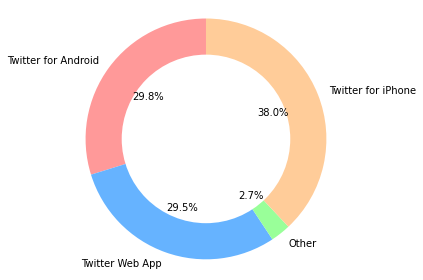

In [9]:
import matplotlib.pyplot as plt
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()
ax1.pie(MOTdf_source_counts['counts'], colors = colors, 
labels=MOTdf_source_counts['source'], autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal') 
plt.tight_layout()
plt.show()